In [1]:
import seaborn as sns
import os 
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path
from scipy import stats

In [2]:
#PATH_TO_DATA = path.Path(r'C:\Users\User\Desktop\visualpilot')
PATH_TO_DATA = path.Path.cwd().parent / 'data' 
all_directories_paths = [x[0] for x in os.walk(PATH_TO_DATA) if 'batch' in x[0].split('\\')[-1] ]


In [3]:

filename = 'one_line_per_participant_all_info_valid_subjects_only.csv'
all_valid_subjects = pd.DataFrame([])
for batch in all_directories_paths:
    time_gap = path.Path(batch).parent.name
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects = pd.concat([all_valid_subjects,file])


In [9]:
df_same_target_pictures = all_valid_subjects.loc[((all_valid_subjects['time_gap'] == 'pilot_same_day') & (all_valid_subjects['batch_number'] > 5)) | (all_valid_subjects['time_gap'] == 'pilot_24_hours') |(all_valid_subjects['time_gap'] == 'pilot_one_week')]

In [10]:
df_same_target_pictures

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike,time_gap,worker_ID,batch_number
A15B4KZ3S04HS8,1.18150,1.0,0.833333,1.817267,1.517700,1.877180,1.037320,1.0,0.700000,1.876378,...,1.846558,0.85,1.623545,0.70,2.157540,0.55,4.0,pilot_24_hours,A15B4KZ3S04HS8,2
A1LA6CIGBNDOH9,0.71570,1.0,0.833333,2.468550,2.668900,2.428480,0.548300,1.0,0.733333,2.866993,...,3.093245,0.65,2.894345,0.75,2.613390,0.80,4.0,pilot_24_hours,A1LA6CIGBNDOH9,2
A22HIX1M4QXZBB,0.54510,1.0,1.000000,2.272117,NaN,2.272117,0.692460,1.0,0.583333,3.183175,...,3.372740,0.75,3.220520,0.45,2.956265,0.55,3.0,pilot_24_hours,A22HIX1M4QXZBB,2
A248QG4DPULP46,0.56340,1.0,0.833333,1.718233,1.181300,1.825620,0.539680,1.0,0.683333,3.492062,...,3.842590,0.70,3.102090,0.60,3.531505,0.75,4.0,pilot_24_hours,A248QG4DPULP46,2
A2J1DNVMJ56JG1,2.22600,1.0,0.666667,3.350233,2.205000,3.922850,1.296075,0.8,0.733333,2.486233,...,2.502740,0.65,2.616580,0.70,2.339380,0.85,7.0,pilot_24_hours,A2J1DNVMJ56JG1,2
A2J57IBR2XIWLS,1.08300,1.0,0.666667,2.974833,4.304500,2.310000,1.206400,1.0,0.616667,1.660333,...,1.622350,0.75,1.686950,0.45,1.671700,0.65,3.0,pilot_24_hours,A2J57IBR2XIWLS,2
A3MIDLO5S7FU06,0.84620,1.0,1.000000,1.414383,NaN,1.414383,0.619760,1.0,0.633333,1.988767,...,1.967465,0.70,2.069960,0.60,1.928875,0.60,5.0,pilot_24_hours,A3MIDLO5S7FU06,2
A3U0GQGAPN2DAV,1.20720,1.0,1.000000,1.760133,NaN,1.760133,1.020020,1.0,0.833333,1.859095,...,2.118780,0.95,1.652190,0.90,1.806315,0.65,5.0,pilot_24_hours,A3U0GQGAPN2DAV,2
A5P12YJP805RG,0.63460,1.0,0.833333,2.051050,2.510500,1.959160,0.505460,1.0,0.700000,1.340883,...,1.654905,0.70,1.139240,0.80,1.228505,0.60,3.0,pilot_24_hours,A5P12YJP805RG,2
ASNNAP90D5R1Z,1.18200,1.0,0.666667,3.093833,3.603000,2.839250,1.640800,1.0,0.616667,3.017153,...,3.155474,0.65,2.911750,0.80,2.991150,0.40,4.0,pilot_24_hours,ASNNAP90D5R1Z,2


In [50]:
n_same_day,n_24_hours,n_one_week =df_same_target_pictures['time_gap'].value_counts()

lets check if there are duplicate subject names , if so we drop one of there rows 

In [13]:
all_valid_subjects

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike,time_gap,worker_ID,batch_number
A15B4KZ3S04HS8,1.1815,1.0,0.833333,1.817267,1.517700,1.877180,1.037320,1.0,0.700000,1.876378,...,1.846558,0.85,1.623545,0.70,2.157540,0.55,4.0,pilot_24_hours,A15B4KZ3S04HS8,2
A1LA6CIGBNDOH9,0.7157,1.0,0.833333,2.468550,2.668900,2.428480,0.548300,1.0,0.733333,2.866993,...,3.093245,0.65,2.894345,0.75,2.613390,0.80,4.0,pilot_24_hours,A1LA6CIGBNDOH9,2
A22HIX1M4QXZBB,0.5451,1.0,1.000000,2.272117,NaN,2.272117,0.692460,1.0,0.583333,3.183175,...,3.372740,0.75,3.220520,0.45,2.956265,0.55,3.0,pilot_24_hours,A22HIX1M4QXZBB,2
A248QG4DPULP46,0.5634,1.0,0.833333,1.718233,1.181300,1.825620,0.539680,1.0,0.683333,3.492062,...,3.842590,0.70,3.102090,0.60,3.531505,0.75,4.0,pilot_24_hours,A248QG4DPULP46,2
A2J1DNVMJ56JG1,2.2260,1.0,0.666667,3.350233,2.205000,3.922850,1.296075,0.8,0.733333,2.486233,...,2.502740,0.65,2.616580,0.70,2.339380,0.85,7.0,pilot_24_hours,A2J1DNVMJ56JG1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1JT6ZF5PMQBM1,1.0689,1.0,0.500000,2.726167,2.928833,2.523500,1.227540,1.0,0.766667,2.048528,...,2.101920,0.80,2.107665,0.70,1.936000,0.80,7.0,pilot_same_day,A1JT6ZF5PMQBM1,7
A3QYA7EFCS7BA2,0.7878,1.0,1.000000,1.305217,NaN,1.305217,0.641820,1.0,0.833333,1.540307,...,1.472080,0.85,1.522175,0.90,1.626665,0.75,6.0,pilot_same_day,A3QYA7EFCS7BA2,7
A3EWKKJTP2GY2L,2.6520,1.0,0.833333,3.458000,1.574000,3.834800,1.280400,1.0,0.700000,1.509583,...,1.451650,0.75,1.411800,0.65,1.665300,0.70,4.0,pilot_same_day,A3EWKKJTP2GY2L,7
A2KLIBLDVDV144,0.8870,1.0,0.833333,2.137483,2.667100,2.031560,1.251675,0.8,0.800000,2.279028,...,2.669025,0.95,1.895575,0.75,2.272485,0.70,7.0,pilot_same_day,A2KLIBLDVDV144,7


In [14]:
#dup_subject_name = all_valid_subjects[all_valid_subjects.index.value_counts() > 1].index[0]
id = np.where(all_valid_subjects['worker_ID']== 'A2JLNOYPVW7W4V')[0][1]

all_valid_subjects = all_valid_subjects.reset_index(drop=True)
all_valid_subjects.drop([id],inplace=True)
all_valid_subjects = all_valid_subjects.set_index('worker_ID')
all_valid_subjects['worker_ID'] = all_valid_subjects.index

In [15]:
print(f'there are {len(all_valid_subjects.index) - len(set(all_valid_subjects.index))}, duplicate subjects')

there are 0, duplicate subjects


In [16]:


rt_df = pd.melt(df_same_target_pictures,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt'],var_name='layer')

accuracy_df = pd.melt(df_same_target_pictures,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy'],var_name='layer')

Text(0.5, 0.98, 'Memory preformance')

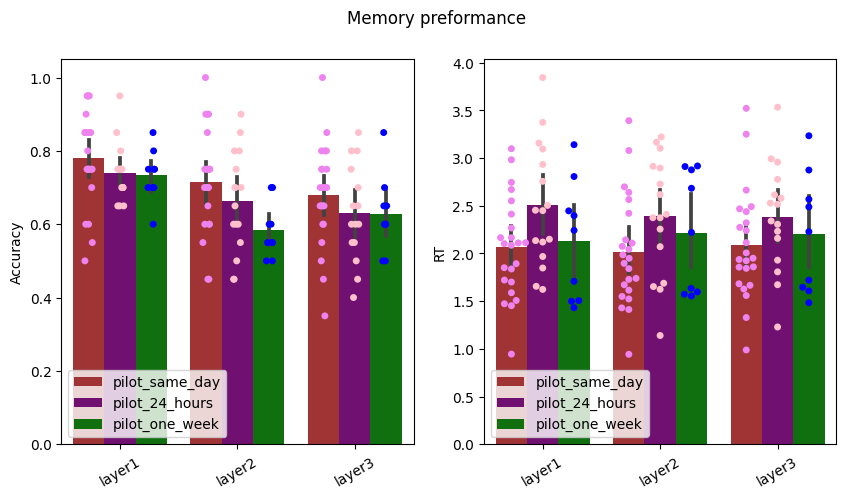

In [28]:


my_order = ['pilot_same_day','pilot_24_hours','pilot_one_week']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],palette={'pilot_same_day':'firebrick','pilot_24_hours':'purple','pilot_one_week':'green'},hue_order=my_order)
sns.stripplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],dodge=True,palette={'pilot_same_day':'violet','pilot_24_hours':'pink','pilot_one_week':'blue'},jitter=True,hue_order=my_order)
axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_xlabel('')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[3:],labels[3:],loc='lower left')
axes[0].set_ylabel('Accuracy')


sns.barplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_same_day':'firebrick','pilot_24_hours':'purple','pilot_one_week':'green'},hue_order=my_order)
sns.swarmplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_same_day':'violet','pilot_24_hours':'pink','pilot_one_week':'blue'},dodge=True,hue_order=my_order)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].legend(handles[3:],labels[3:],loc='lower left')
axes[1].set_ylabel('RT')
axes[1].set_xlabel('')


fig.suptitle('Memory preformance')


Text(0.5, 0.98, 'Memory preformance')

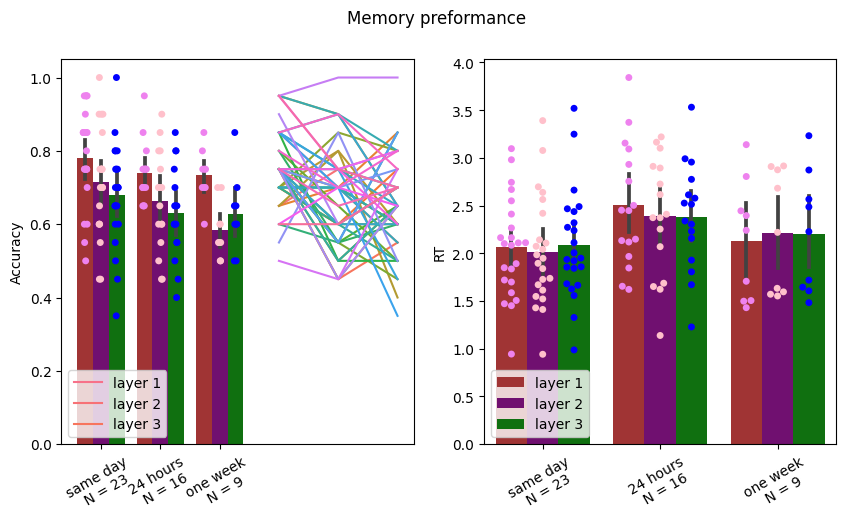

In [85]:
my_order = ['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
bar = sns.barplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes[0],palette={'testing_layer_1_accuracy':'firebrick','testing_layer_2_accuracy':'purple','testing_layer_3_accuracy':'green'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
sns.stripplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes[0],dodge=True,palette={'testing_layer_1_accuracy':'violet','testing_layer_2_accuracy':'pink','testing_layer_3_accuracy':'blue'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
sns.lineplot(data = accuracy_df,x = 'layer',y='value',hue = 'worker_ID',ax=axes[0])
# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
axes[0].set_xlabel('')
axes[0].set_xticklabels(labels=[f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}',f'one week\n N = {n_one_week}'],rotation=30)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[3:],['layer 1','layer 2','layer 3'],loc='lower left')
axes[0].set_ylabel('Accuracy')



my_order = ['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']

sns.barplot(data =rt_df, x='time_gap',y='value',hue='layer',ax=axes[1],palette={'testing_layer_1_rt':'firebrick','testing_layer_2_rt':'purple','testing_layer_3_rt':'green'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
sns.swarmplot(data =rt_df,x='time_gap',y='value',hue='layer',ax=axes[1],palette={'testing_layer_1_rt':'violet','testing_layer_2_rt':'pink','testing_layer_3_rt':'blue'},dodge=True,hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xticklabels(labels=[f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}',f'one week\n N = {n_one_week}'],rotation=30)
axes[1].legend(handles[3:],['layer 1','layer 2','layer 3'],loc='lower left')
axes[1].set_ylabel('RT')
axes[1].set_xlabel('')


fig.suptitle('Memory preformance')

In [82]:
# lets look at the std 
for layer in np.unique(accuracy_df['layer'].values):
    curr_df = accuracy_df[accuracy_df['layer'] == layer]
    curr_vals = curr_df['value']
    layer_num = layer.split('_')[-2]
    print(f'the std for layer {layer_num} is {curr_vals.values.std()}')

    for time in np.unique(curr_df['time_gap'].values):

        curr_vals_time = curr_df[curr_df['time_gap'] == time]['value'] 
        print(f'the std for layer {layer_num} and time gap: {time} is {curr_vals_time.values.std()}')



the std for layer 1 is 0.10374916331657276
the std for layer 1 and time gap: pilot_24_hours is 0.07545435292281022
the std for layer 1 and time gap: pilot_one_week is 0.06666666666666668
the std for layer 1 and time gap: pilot_same_day is 0.12574917273025712
the std for layer 2 is 0.1342255305653718
the std for layer 2 and time gap: pilot_24_hours is 0.1328768226591831
the std for layer 2 and time gap: pilot_one_week is 0.07071067811865472
the std for layer 2 and time gap: pilot_same_day is 0.1354820560946338
the std for layer 3 is 0.12781551375148306
the std for layer 3 and time gap: pilot_24_hours is 0.12358574958303244
the std for layer 3 and time gap: pilot_one_week is 0.10030816714037659
the std for layer 3 and time gap: pilot_same_day is 0.13492278825376436


In [81]:
curr_df

,worker_ID,time_gap,layer,value
96,A15B4KZ3S04HS8,pilot_24_hours,testing_layer_3_accuracy,0.55
97,A1LA6CIGBNDOH9,pilot_24_hours,testing_layer_3_accuracy,0.80
98,A22HIX1M4QXZBB,pilot_24_hours,testing_layer_3_accuracy,0.55
99,A248QG4DPULP46,pilot_24_hours,testing_layer_3_accuracy,0.75
100,A2J1DNVMJ56JG1,pilot_24_hours,testing_layer_3_accuracy,0.85
101,A2J57IBR2XIWLS,pilot_24_hours,testing_layer_3_accuracy,0.65
102,A3MIDLO5S7FU06,pilot_24_hours,testing_layer_3_accuracy,0.60
103,A3U0GQGAPN2DAV,pilot_24_hours,testing_layer_3_accuracy,0.65
104,A5P12YJP805RG,pilot_24_hours,testing_layer_3_accuracy,0.60
105,ASNNAP90D5R1Z,pilot_24_hours,testing_layer_3_accuracy,0.40


In [21]:
all_valid_subjects.head(10)

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike,time_gap,batch_number,worker_ID
worker_ID,,,,,,,,,,,,,,,,,,,,,
A15B4KZ3S04HS8,1.1815,1.0,0.833333,1.817267,1.5177,1.877180,1.037320,1.0,0.700000,1.876378,...,1.846558,0.85,1.623545,0.70,2.157540,0.55,4.0,pilot_24_hours,2,A15B4KZ3S04HS8
A1LA6CIGBNDOH9,0.7157,1.0,0.833333,2.468550,2.6689,2.428480,0.548300,1.0,0.733333,2.866993,...,3.093245,0.65,2.894345,0.75,2.613390,0.80,4.0,pilot_24_hours,2,A1LA6CIGBNDOH9
A22HIX1M4QXZBB,0.5451,1.0,1.000000,2.272117,NaN,2.272117,0.692460,1.0,0.583333,3.183175,...,3.372740,0.75,3.220520,0.45,2.956265,0.55,3.0,pilot_24_hours,2,A22HIX1M4QXZBB
A248QG4DPULP46,0.5634,1.0,0.833333,1.718233,1.1813,1.825620,0.539680,1.0,0.683333,3.492062,...,3.842590,0.70,3.102090,0.60,3.531505,0.75,4.0,pilot_24_hours,2,A248QG4DPULP46
A2J1DNVMJ56JG1,2.2260,1.0,0.666667,3.350233,2.2050,3.922850,1.296075,0.8,0.733333,2.486233,...,2.502740,0.65,2.616580,0.70,2.339380,0.85,7.0,pilot_24_hours,2,A2J1DNVMJ56JG1
A2J57IBR2XIWLS,1.0830,1.0,0.666667,2.974833,4.3045,2.310000,1.206400,1.0,0.616667,1.660333,...,1.622350,0.75,1.686950,0.45,1.671700,0.65,3.0,pilot_24_hours,2,A2J57IBR2XIWLS
A3MIDLO5S7FU06,0.8462,1.0,1.000000,1.414383,NaN,1.414383,0.619760,1.0,0.633333,1.988767,...,1.967465,0.70,2.069960,0.60,1.928875,0.60,5.0,pilot_24_hours,2,A3MIDLO5S7FU06
A3U0GQGAPN2DAV,1.2072,1.0,1.000000,1.760133,NaN,1.760133,1.020020,1.0,0.833333,1.859095,...,2.118780,0.95,1.652190,0.90,1.806315,0.65,5.0,pilot_24_hours,2,A3U0GQGAPN2DAV
A5P12YJP805RG,0.6346,1.0,0.833333,2.051050,2.5105,1.959160,0.505460,1.0,0.700000,1.340883,...,1.654905,0.70,1.139240,0.80,1.228505,0.60,3.0,pilot_24_hours,2,A5P12YJP805RG


In [54]:
ALL_EXP_ALL_DATA_LOCATION=path.Path('../data/')
all_participants_results_files=list(set([sub_path.parent.parent for sub_path in list(ALL_EXP_ALL_DATA_LOCATION.rglob('*.csv')) if '-' in sub_path.name]))
#remove the sameday batches that are not 6 or 7
all_participants_batch_locations=[curpath for curpath in all_participants_results_files if (('pilot_same_day' in str(curpath)) and (curpath.name in ['batch 6','batch 7'])) or ('pilot_24_hours' in str(curpath))]

In [130]:
all_subjects_encoding_long_format_df=pd.DataFrame()
all_subjects_test_long_format_df=pd.DataFrame()
for cur_batch in all_participants_batch_locations:
    cur_sub_encoding_df=pd.read_csv(cur_batch / 'all_subjects_encoding_df.csv')
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_test_df.csv')

    cur_sub_encoding_df['time_gap']=cur_batch.parent.name
    cur_sub_test_df['time_gap']=cur_batch.parent.name

    all_subjects_encoding_long_format_df=pd.concat([all_subjects_encoding_long_format_df,cur_sub_encoding_df],axis=0)
    all_subjects_test_long_format_df=pd.concat([all_subjects_test_long_format_df,cur_sub_test_df],axis=0)


all_valid_test_df_long_format=pd.DataFrame()
all_valid_encoding_df_long_format=pd.DataFrame()

for cur_sub in all_valid_subjects.index:
    cur_sub_encoding=all_subjects_encoding_long_format_df[all_subjects_encoding_long_format_df['subject']==cur_sub]
    cur_sub_test=all_subjects_test_long_format_df[all_subjects_test_long_format_df['subject']==cur_sub]


    all_valid_encoding_df_long_format=pd.concat([all_valid_encoding_df_long_format,cur_sub_encoding],axis=0)
    all_valid_test_df_long_format=pd.concat([all_valid_test_df_long_format,cur_sub_test],axis=0)




In [131]:
all_valid_encoding_df_long_format

,Unnamed: 0,index,test_encoding_response.keys,test_encoding_response.corr,trials.thisTrialN,target_image,pair,layer,correct,test_encoding_response.rt,key_resp_end.keys,subject,time_gap
0,0,20,NaN,1.0,0.0,2898635428-69104.jpg,2901943411-292945.jpg,2.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
1,1,21,NaN,1.0,1.0,2874302418-65979.jpg,2238578544-111698.jpg,3.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
2,2,22,NaN,1.0,2.0,2449442529-124446.jpg,2460547536-274181.jpg,2.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
3,3,23,NaN,1.0,3.0,2864910426-287204.jpg,2874299429-139694.jpg,2.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
4,4,24,NaN,1.0,4.0,2898624426-291546.jpg,2981235446-294900.jpg,3.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,1620,80,NaN,1.0,60.0,2512875899-126682.jpg,2986447332-371497.jpg,3.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day
1621,1621,81,NaN,1.0,61.0,2446758985-197609.jpg,2981240424-145795.jpg,1.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day
1622,1622,82,NaN,1.0,62.0,2898633421-291973.jpg,2575118671-277663.jpg,2.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day
1623,1623,83,NaN,1.0,63.0,2238572663-35822.jpg,2864903351-286874.jpg,3.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day


In [135]:
images_position_accuracy_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])
target_images=set(all_valid_encoding_df_long_format['target_image'].unique())-{'left.jpg','right.jpg'}
for cur_img in target_images:
     
    img_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])
    cur_encoding_img_info=all_valid_encoding_df_long_format[all_valid_encoding_df_long_format['target_image']==cur_img]
    img_df['target_layer']=cur_encoding_img_info['layer'].values
    img_df['serial_position_in_encoding']=cur_encoding_img_info['trials.thisTrialN'].values
    img_df['viewed_by_encoding']= cur_encoding_img_info['subject'].values
    img_df['img_name']=cur_img
    img_df['time_gap']=cur_encoding_img_info['time_gap'].values
    #get from test: 
    cur_test_img_info=all_valid_test_df_long_format[(all_valid_test_df_long_format['image1']==cur_img) | (all_valid_test_df_long_format['image2']==cur_img)]

    img_df['distractor_layer']=cur_test_img_info['layer'].values
    img_df['is_correct']=cur_test_img_info['test_test_response.corr'].values
    img_df['distractor_side']=cur_test_img_info['correct'].values
    img_df['viewed_by_test']=cur_test_img_info['subject'].values

    images_position_accuracy_df=pd.concat([images_position_accuracy_df,img_df],axis=0)
#remember to change left to right and right to left: 


In [136]:
images_position_accuracy_df

,img_name,target_layer,distractor_layer,serial_position_in_encoding,is_correct,viewed_by_encoding,viewed_by_test,distractor_side,time_gap
0,2901941401-292798.jpg,3.0,3.0,33.0,1.0,A15B4KZ3S04HS8,A15B4KZ3S04HS8,right,pilot_24_hours
1,2901941401-292798.jpg,2.0,2.0,25.0,0.0,A1LA6CIGBNDOH9,A1LA6CIGBNDOH9,left,pilot_24_hours
2,2901941401-292798.jpg,2.0,2.0,16.0,0.0,A22HIX1M4QXZBB,A22HIX1M4QXZBB,right,pilot_24_hours
3,2901941401-292798.jpg,3.0,3.0,47.0,0.0,A248QG4DPULP46,A248QG4DPULP46,left,pilot_24_hours
4,2901941401-292798.jpg,3.0,3.0,25.0,0.0,A2J1DNVMJ56JG1,A2J1DNVMJ56JG1,left,pilot_24_hours
...,...,...,...,...,...,...,...,...,...
34,2883268412-365898.jpg,2.0,2.0,15.0,1.0,A1JT6ZF5PMQBM1,A1JT6ZF5PMQBM1,right,pilot_same_day
35,2883268412-365898.jpg,3.0,3.0,12.0,0.0,A3QYA7EFCS7BA2,A3QYA7EFCS7BA2,left,pilot_same_day
36,2883268412-365898.jpg,3.0,3.0,4.0,0.0,A3EWKKJTP2GY2L,A3EWKKJTP2GY2L,left,pilot_same_day
37,2883268412-365898.jpg,1.0,1.0,9.0,1.0,A2KLIBLDVDV144,A2KLIBLDVDV144,left,pilot_same_day


In [146]:
grouped_df=images_position_accuracy_df.groupby(['time_gap','distractor_layer','serial_position_in_encoding']).aggregate({'is_correct':['mean','std']})


KeyError: ('pilot_24_hours', '1.0', 'serial_position_in_encoding')

<AxesSubplot:xlabel='serial_position_in_encoding'>

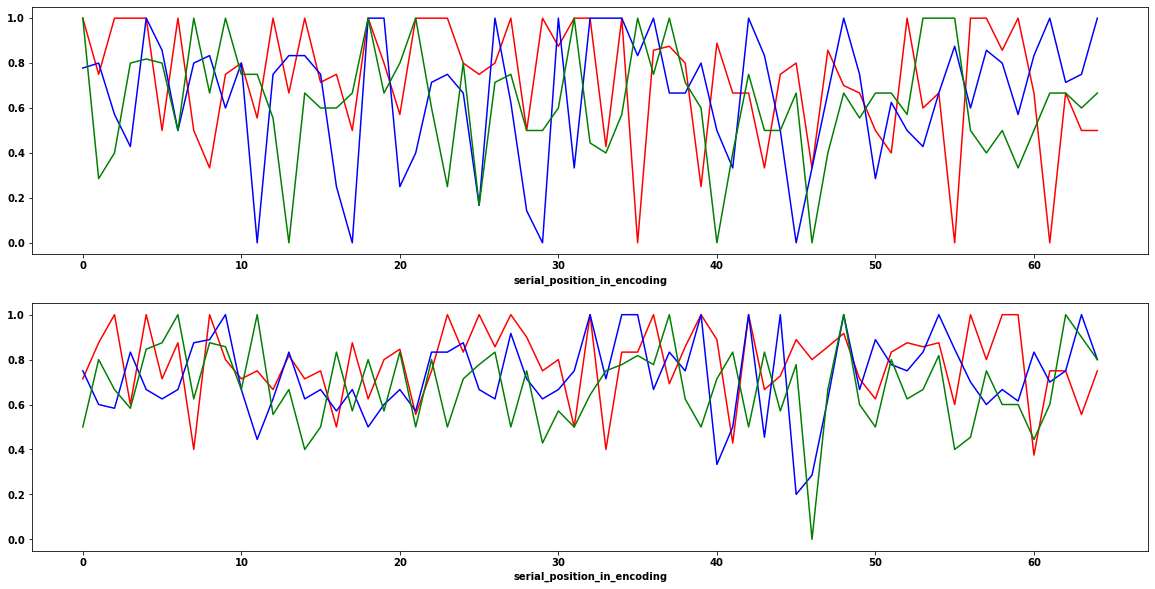

In [165]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(20,10))
grouped_df.loc['pilot_24_hours', 1.0]['is_correct', 'mean'].plot(ax=axes[0],color='r')
grouped_df.loc['pilot_24_hours', 2.0]['is_correct', 'mean'].plot(ax=axes[0],color='b')
grouped_df.loc['pilot_24_hours', 3.0]['is_correct', 'mean'].plot(ax=axes[0],color='g')

grouped_df.loc['pilot_same_day', 1.0]['is_correct', 'mean'].plot(ax=axes[1],color='r')
grouped_df.loc['pilot_same_day', 2.0]['is_correct', 'mean'].plot(ax=axes[1],color='b')
grouped_df.loc['pilot_same_day', 3.0]['is_correct', 'mean'].plot(ax=axes[1],color='g')

In [141]:
images_position_accuracy_df.columns

Index(['img_name', 'target_layer', 'distractor_layer',
       'serial_position_in_encoding', 'is_correct', 'viewed_by_encoding',
       'viewed_by_test', 'distractor_side', 'time_gap'],
      dtype='object')

In [128]:
images_position_accuracy_df

,img_name,target_layer,distractor_layer,serial_position_in_encoding,is_correct,viewed_by_encoding,viewed_by_test,distractor_side
0,2901941401-292798.jpg,3.0,3.0,33.0,1.0,A15B4KZ3S04HS8,A15B4KZ3S04HS8,right
1,2901941401-292798.jpg,2.0,2.0,25.0,0.0,A1LA6CIGBNDOH9,A1LA6CIGBNDOH9,left
2,2901941401-292798.jpg,2.0,2.0,16.0,0.0,A22HIX1M4QXZBB,A22HIX1M4QXZBB,right
3,2901941401-292798.jpg,3.0,3.0,47.0,0.0,A248QG4DPULP46,A248QG4DPULP46,left
4,2901941401-292798.jpg,3.0,3.0,25.0,0.0,A2J1DNVMJ56JG1,A2J1DNVMJ56JG1,left
...,...,...,...,...,...,...,...,...
34,2883268412-365898.jpg,2.0,2.0,15.0,1.0,A1JT6ZF5PMQBM1,A1JT6ZF5PMQBM1,right
35,2883268412-365898.jpg,3.0,3.0,12.0,0.0,A3QYA7EFCS7BA2,A3QYA7EFCS7BA2,left
36,2883268412-365898.jpg,3.0,3.0,4.0,0.0,A3EWKKJTP2GY2L,A3EWKKJTP2GY2L,left
37,2883268412-365898.jpg,1.0,1.0,9.0,1.0,A2KLIBLDVDV144,A2KLIBLDVDV144,left
